## Image Classification  
Yazan Abughazaleh

The purpose of this notebook is to demonstrate image classification with neural networks. The notebook will be utilizing a sequential model, a CNN model, a pre-trained model, and a transfer learning model. The first step we need to perform is to load the image data which we would like to classify. Our data is separated into four groups: Two sets of images for two different classes and two CSV files containing labels and other data associated with each image. The data set is the Animal Crossing or Doom Dataset found at https://www.kaggle.com/datasets/andrewmvd/doom-crossing?resource=download.

In [204]:
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras_preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



After importing tensorflow and other libraries above, we can start to load our data.

In [205]:
from sklearn.model_selection import train_test_split
dfA = pd.read_csv("dataset/animal_crossing_dataset.csv",dtype="str")
dfB = pd.read_csv("dataset/doom_crossing_dataset.csv",dtype="str")
df = pd.concat([dfA,dfB])
print(dfA.shape)
print(dfB.shape)
print(df.shape)
train, test = train_test_split(df, test_size=0.2, random_state=1234)
train.head()

(757, 11)
(839, 11)
(1596, 11)


subreddit      id                                        title  \
458  AnimalCrossing  g1ddyw              My mid-century modern bathroom~   
486  AnimalCrossing  gietxl  Okay well one of us is gonna have to change   
514            Doom  fq21bg            You damn well know he was excited   
645            Doom  cvsvgi               I present you the 2016 version   
33   AnimalCrossing  g3ogs3                         This bugs me so much   

       ups downs upvote_ratio total_awards_received num_comments  \
458  15971     0         0.99                     1          224   
486  15476     0         0.99                     0           65   
514   3249     0            1                     1           94   
645   2829     0         0.98                     0           43   
33   53800     0         0.93                     2          627   

      created_utc                                  url           filename  
458  1586896722.0  https://i.redd.it/ir5oid32hus41.png  ir5oid32hus41.png  
486  1589301711.0  https://i.redd.it/4z78v30g4dy41.jpg  4z78v30g4dy41.jpg  
514    1585332305  https://i.redd.it/uzpuxz4d99p41.jpg  uzpuxz4d99p41.jpg  
645    1566848013  https://i.redd.it/4278caqzhui31.jpg  4278caqzhui31.jpg  
33   1587220521.0  https://i.redd.it/uqlg2mzz7lt41.jpg  uqlg2mzz7lt41.jpg

In [206]:
import shutil


def idTrainImage(dfA,dfB):
    if os.path.exists('./dataset/test/'):
        shutil.rmtree('./dataset/test/')
    if os.path.exists('./dataset/train/'):
        shutil.rmtree('./dataset/train/')
    os.mkdir('./dataset/train/')
    os.mkdir('./dataset/test/')
    #dfA['filename'] = dfA['filename'].astype('|S')
    #dfB['filename'] = dfB['filename'].astype('|S')
    #print(dfA['filename'])
    for index, row in dfA.iterrows():
        filename = str(dfA['filename'][index])
        filename = filename.split()
        if len(filename) > 1:
            copyname = './dataset/images/'+filename[1]
            
        shutil.copy(str(copyname),'./dataset/train')
    for index, row in dfB.iterrows():
        filename = str(dfB['filename'][index])
        filename = filename.split()
        if len(filename) > 1:
            copyname = './dataset/images/'+filename[1]
            shutil.copy(str(copyname),'./dataset/test/')

idTrainImage(train,test)

The function above splits the images into a train and test data set based on the labels in the csv files. We can now load our images.

In [207]:
trainingImage = tf.keras.utils.image_dataset_from_directory('./archive/',
    batch_size=32,
    image_size=(100, 100),
    seed=1234,
    validation_split=.2,
    subset="training")

validationImage = tf.keras.utils.image_dataset_from_directory(
    './archive/',
    batch_size=32,
    image_size=(100, 100),
    seed=1234,
    validation_split=.2,
    subset="validation"
)

Found 1597 files belonging to 2 classes.
Using 1278 files for training.
Found 1597 files belonging to 2 classes.
Using 319 files for validation.


In [208]:
print("Cardinality Train Set %d" % tf.data.experimental.cardinality(trainingImage))
val = tf.data.experimental.cardinality(validationImage) // 5
testImage = validationImage.take(val)
validationImage = validationImage.skip(val)
print("Cardinality Validation Set %d" % tf.data.experimental.cardinality(validationImage))
print("Cardinality Test Set %d" % tf.data.experimental.cardinality(testImage))

Cardinality Train Set 40
Cardinality Validation Set 8
Cardinality Test Set 2


Now we would like to create a graph of the distribution of the image classes. To do this, we can take the count of each image class and graph that as a bar plot.

[Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Class Density Plot')]

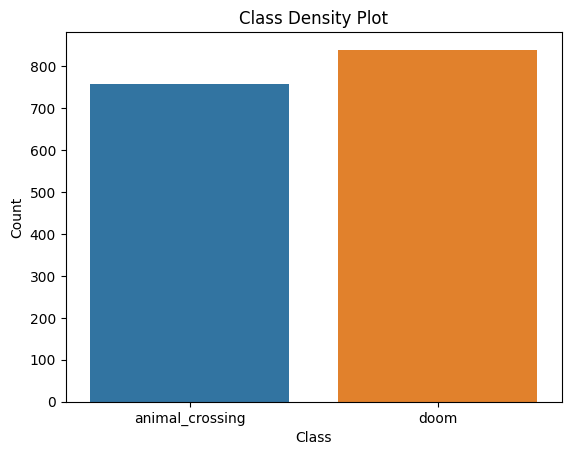

In [209]:
import seaborn as sb
class_dist = []
class_dist.append(len(dfA.index))
class_dist.append(len(dfB.index))

#X = np.array(['animal_crossing','doom'])
X = np.array(trainingImage.class_names)
Y = np.array(class_dist)
bPlot = sb.barplot(x=X,y=Y)
bPlot.set(xlabel="Class",ylabel="Count", title="Class Density Plot")

The goal of this classification model is to determine whether an image is associated with the Animal Crossing or Doom Franchise of video games. Below a few examples are provided showing labels with the correct images.

2023-04-16 15:10:35.097536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1278]
	 [[{{node Placeholder/_0}}]]
2023-04-16 15:10:35.099485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1278]
	 [[{{node Placeholder/_4}}]]


<Figure size 1000x1000 with 0 Axes>

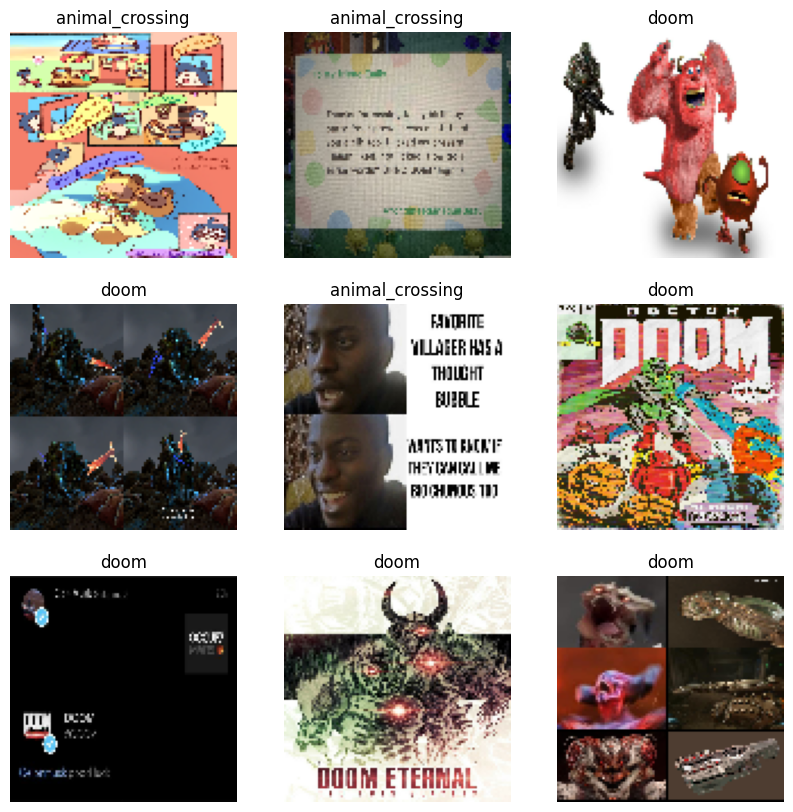

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
class_names = trainingImage.class_names
plt.figure(figsize=(10, 10))
for images, labels in trainingImage.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Configure Data for Performance
To maximize the performance of the training process, we will use buffered prefetching to stop I/O blocking from happening and speed up the data fetching process.

In [211]:
AUTOTUNE = tf.data.AUTOTUNE

trainingImage = trainingImage.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validationImage = validationImage.cache().prefetch(buffer_size=AUTOTUNE)

### Scaling the Data
The range of the input values between 0 and 255 is not ideal for training with a neural network. We want to put it in the range of 0 and 1 because neural networks work best on small data.

In [212]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = trainingImage.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

2023-04-16 15:10:51.446038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1278]
	 [[{{node Placeholder/_4}}]]
2023-04-16 15:10:51.447871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1278]
	 [[{{node Placeholder/_4}}]]
2023-04-16 15:11:02.748863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 15:11:03.505834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 15:11:06.808786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: i

0.0 1.0


### Data Augmentation

In [214]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Building the Model

In [246]:
num_classes = 2
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(100, 100,3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

### Compile the Model

In [247]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary


In [244]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 665,602
Trainable params: 665,602
Non-t

### Model Training

In [248]:
epochs=20
history = model.fit(
  trainingImage,
  validation_data=validationImage,
  epochs=epochs
)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 10s 182ms/step - loss: 3723.5117 - accuracy: 0.4969 - val_loss: 652.2740 - val_accuracy: 0.5333
Epoch 2/20
40/40 [==============================] - 6s 161ms/step - loss: 135.5471 - accuracy: 0.5070 - val_loss: 0.7382 - val_accuracy: 0.5333
Epoch 3/20
40/40 [==============================] - 6s 158ms/step - loss: 2.1876 - accuracy: 0.4977 - val_loss: 0.6914 - val_accuracy: 0.5294
Epoch 4/20
40/40 [==============================] - 6s 157ms/step - loss: 3.3401 - accuracy: 0.5149 - val_loss: 0.7035 - val_accuracy: 0.5294
Epoch 5/20
40/40 [==============================] - 6s 161ms/step - loss: 2.6347 - accuracy: 0.5243 - val_loss: 0.7078 - val_accuracy: 0.5294
Epoch 6/20
40/40 [==============================] - 7s 166ms/step - loss: 2.9214 - accuracy: 0.5219 - val_loss: 0.7092 - val_accuracy: 0.5294
Epoch 7/20
40/40 [==============================] - 7s 162ms/step - loss: 0.7978 - accuracy: 0.5203 - val_loss: 0.7037 - val_accuracy: 0.5294
Epoch 8/2

### Visualizing the Training

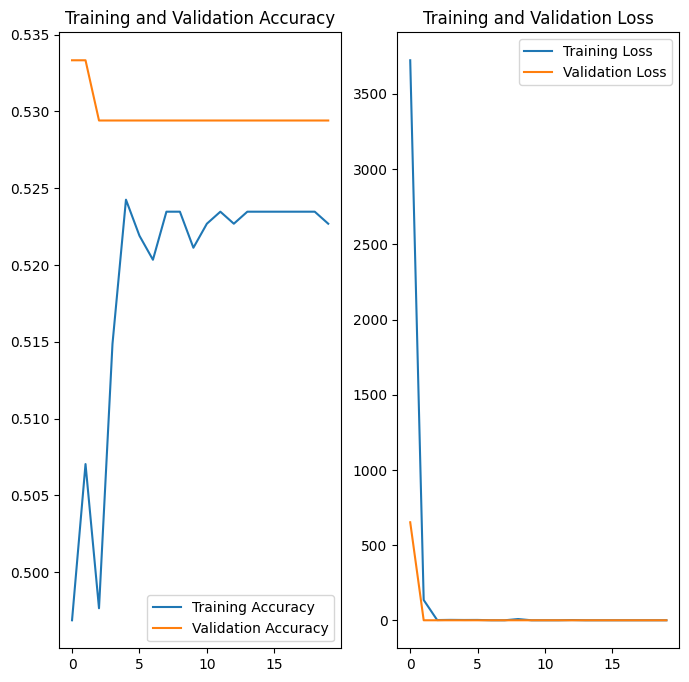

In [249]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The plots above show a validation accuracy that is higher than the training accuracy at around 53%. The model is likely not very good at predicting the image class.

### Evaluate the Model on Test Data

In [250]:
score = model.evaluate(testImage)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

2023-04-16 17:27:20.059850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data
2023-04-16 17:27:20.744041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 17:27:22.891015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 17:27:22.891209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


2/2 [==============================] - 10s 891ms/step - loss: 0.7327 - accuracy: 0.5000
Loss:  0.7327266931533813
Accuracy:  0.5


We can see that the model has very mediocre accuracy on the test set at 50%.

### Prediction on an Independent Image
Now we would like to classify a new image that has not been previously seen by the model. The first image should be classified under the animal crossing label while the second should belong to the doom class.

1/1 [==============================] - 0s 194ms/step
This image most likely belongs to doom with a 51.30 percent confidence.


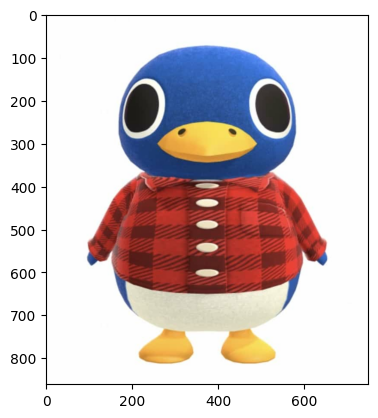

In [251]:
from tensorflow import io
from tensorflow import image
img_path = 'penguino.jpeg'
im = io.read_file(img_path)
im = image.decode_jpeg(im,channels=3)
plt.imshow(im)

img = tf.keras.utils.load_img(
    img_path, target_size=(100, 100)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 62ms/step
This image most likely belongs to doom with a 51.30 percent confidence.


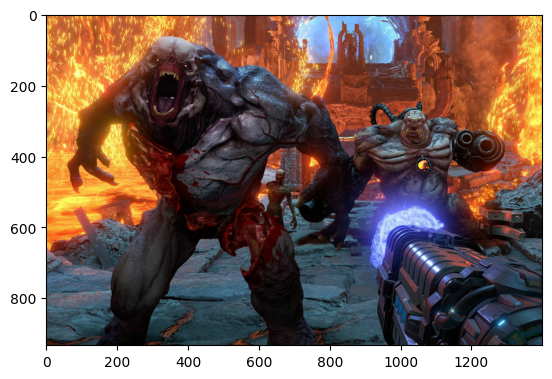

In [252]:
img_path = 'imgA.jpg'
im = io.read_file(img_path)
im = image.decode_jpeg(im,channels=3)
plt.imshow(im)

img = tf.keras.utils.load_img(
    img_path, target_size=(100, 100)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

### Convolutional Network Base
We now would like to create a new model with a CNN architecture to see if we can yield any improvements.

In [253]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 25, 25, 64)      

### Compile the CNN model

In [254]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Fit the Model to the Training Data
We now we can proceed to train the model by using fitting it to the training data.

In [255]:
epochs=20
history = model.fit(
  trainingImage,
  validation_data=validationImage,
  epochs=epochs
)

Epoch 1/20
40/40 [==============================] - 14s 257ms/step - loss: 0.6833 - accuracy: 0.5610 - val_loss: 0.6729 - val_accuracy: 0.5882
Epoch 2/20
40/40 [==============================] - 9s 227ms/step - loss: 0.5511 - accuracy: 0.7183 - val_loss: 0.5676 - val_accuracy: 0.7137
Epoch 3/20
40/40 [==============================] - 10s 242ms/step - loss: 0.5065 - accuracy: 0.7582 - val_loss: 0.5130 - val_accuracy: 0.7451
Epoch 4/20
40/40 [==============================] - 10s 255ms/step - loss: 0.4379 - accuracy: 0.7926 - val_loss: 0.4550 - val_accuracy: 0.7529
Epoch 5/20
40/40 [==============================] - 11s 271ms/step - loss: 0.4180 - accuracy: 0.7903 - val_loss: 0.5379 - val_accuracy: 0.7451
Epoch 6/20
40/40 [==============================] - 11s 262ms/step - loss: 0.3830 - accuracy: 0.8310 - val_loss: 0.5039 - val_accuracy: 0.7647
Epoch 7/20
40/40 [==============================] - 11s 273ms/step - loss: 0.3195 - accuracy: 0.8584 - val_loss: 0.4995 - val_accuracy: 0.7608


The model has now been trained, so we can again visualize its performance.

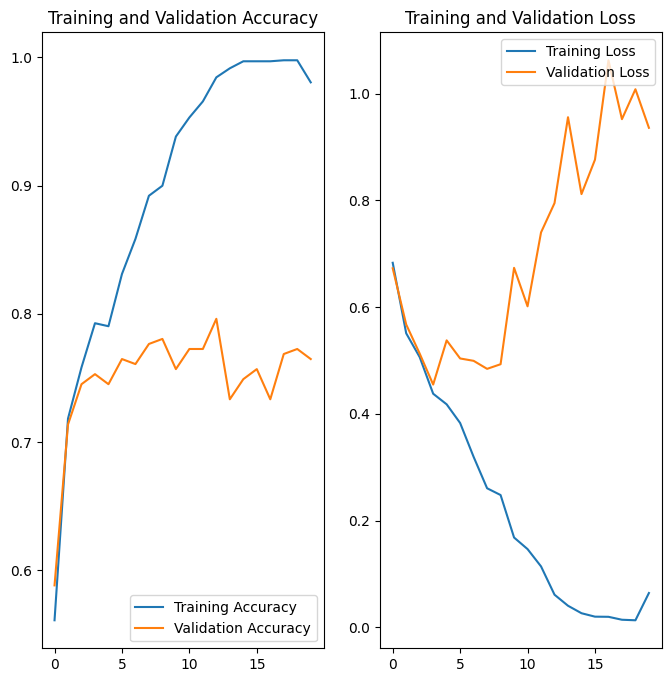

In [256]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In the plots above we can see that the training anv validation accuracies have a significant difference in their results. The training accuracy is significantly higher than the validation accuracy, indicating that the model is not over fitting and the validation accuracy is relatively high at around 75% indicating good results for predictions. This is significantly better than the Sequential Model.

### Evaluate the Model

In [257]:
score = model.evaluate(testImage)

print("Loss: ",score[0])
print("Accuracy: ",score[1])

2023-04-16 17:33:23.598832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data
2023-04-16 17:33:24.589550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 17:33:27.284245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 17:33:27.284287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


2/2 [==============================] - 10s 1s/step - loss: 0.7030 - accuracy: 0.7969
Loss:  0.7030230164527893
Accuracy:  0.796875


With the evaluation on the test set, the performance of the CNN model had a significant improvement in accuracy over the sequential model

### Predicting on New Data
For this we will repeat the data used earlier.

1/1 [==============================] - 0s 171ms/step
This image most likely belongs to animal_crossing with a 93.26 percent confidence.


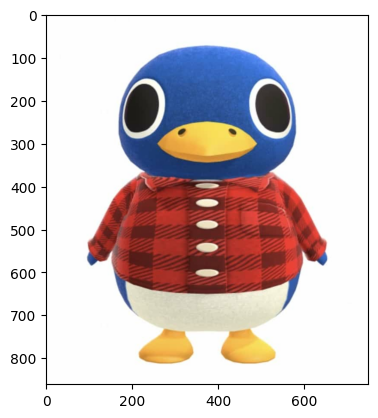

In [258]:
img_path = 'penguino.jpeg'
im = io.read_file(img_path)
im = image.decode_jpeg(im,channels=3)
plt.imshow(im)

img = tf.keras.utils.load_img(
    img_path, target_size=(100, 100)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to animal_crossing with a 66.05 percent confidence.


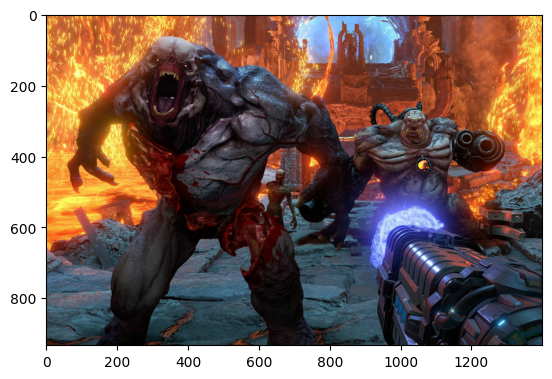

In [259]:
img_path = 'imgA.jpg'
im = io.read_file(img_path)
im = image.decode_jpeg(im,channels=3)
plt.imshow(im)

img = tf.keras.utils.load_img(
    img_path, target_size=(100, 100)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

We can see that the model did successfully classify the sets, however the performance was worse than the sequential model.

### Transfer Learning

The last type of model we would like to train for the image classifier is a transfer learning model, which uses an existing architecture with a new data set.

2023-04-16 15:16:23.539448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1278]
	 [[{{node Placeholder/_0}}]]
2023-04-16 15:16:23.540341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1278]
	 [[{{node Placeholder/_0}}]]


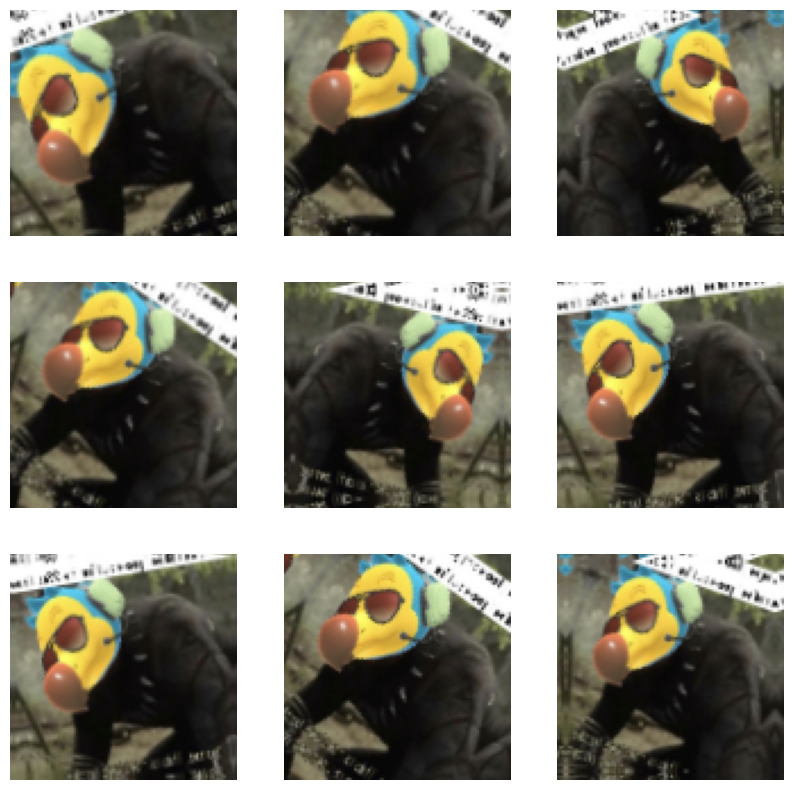

In [215]:
for image, _ in trainingImage.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

We need to rescale the pixel values of the images we use to train the new model.

In [216]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Next we will create a base from a pre-trained model.

In [222]:
# Create the base model from the pre-trained model MobileNet V2

IMG_SHAPE = (100,100) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               alpha=1.0,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [224]:
image_batch, label_batch = next(iter(trainingImage))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2023-04-16 15:52:14.065846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1278]
	 [[{{node Placeholder/_4}}]]
2023-04-16 15:52:14.067723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1278]
	 [[{{node Placeholder/_0}}]]


(32, 4, 4, 1280)


The next step will freeze the convolutional base to prevent weights from being updated.

In [226]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][

In [227]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1280)
(32, 1)


Now we can build a model by chaining together the inputs from data augmentation and the base model we are using.

In [228]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

The model can now be compiled and we can see an output summary.

In [229]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 sequential_9 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 100, 100, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 100, 100, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                             

### Training the Transfer Learning Model
We will now train the model with 20 epochs.

In [230]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validationImage)

2023-04-16 15:59:50.986326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [319]
	 [[{{node Placeholder/_0}}]]
2023-04-16 15:59:50.987685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [319]
	 [[{{node Placeholder/_0}}]]
2023-04-16 16:00:00.555708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data
2023-04-16 16:00:01.204868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 16:00:03.415221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: kn

8/8 [==============================] - 16s 243ms/step - loss: 1.0755 - accuracy: 0.4941


We can now see the initial loss and accuracy of the model.

In [231]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.08
initial accuracy: 0.49


In [232]:
history = model.fit(trainingImage,
                    epochs=initial_epochs,
                    validation_data=validationImage)

Epoch 1/20
40/40 [==============================] - 20s 349ms/step - loss: 0.8632 - accuracy: 0.5454 - val_loss: 0.8713 - val_accuracy: 0.5137
Epoch 2/20
40/40 [==============================] - 14s 340ms/step - loss: 0.8106 - accuracy: 0.5775 - val_loss: 0.7927 - val_accuracy: 0.5725
Epoch 3/20
40/40 [==============================] - 14s 348ms/step - loss: 0.7196 - accuracy: 0.6189 - val_loss: 0.7423 - val_accuracy: 0.6039
Epoch 4/20
40/40 [==============================] - 14s 345ms/step - loss: 0.6729 - accuracy: 0.6565 - val_loss: 0.6969 - val_accuracy: 0.6353
Epoch 5/20
40/40 [==============================] - 15s 373ms/step - loss: 0.6230 - accuracy: 0.6808 - val_loss: 0.6678 - val_accuracy: 0.6549
Epoch 6/20
40/40 [==============================] - 15s 364ms/step - loss: 0.6104 - accuracy: 0.6823 - val_loss: 0.6379 - val_accuracy: 0.6784
Epoch 7/20
40/40 [==============================] - 15s 364ms/step - loss: 0.5987 - accuracy: 0.7003 - val_loss: 0.6207 - val_accuracy: 0.6863

### Evaluating the Transfer Learning Model

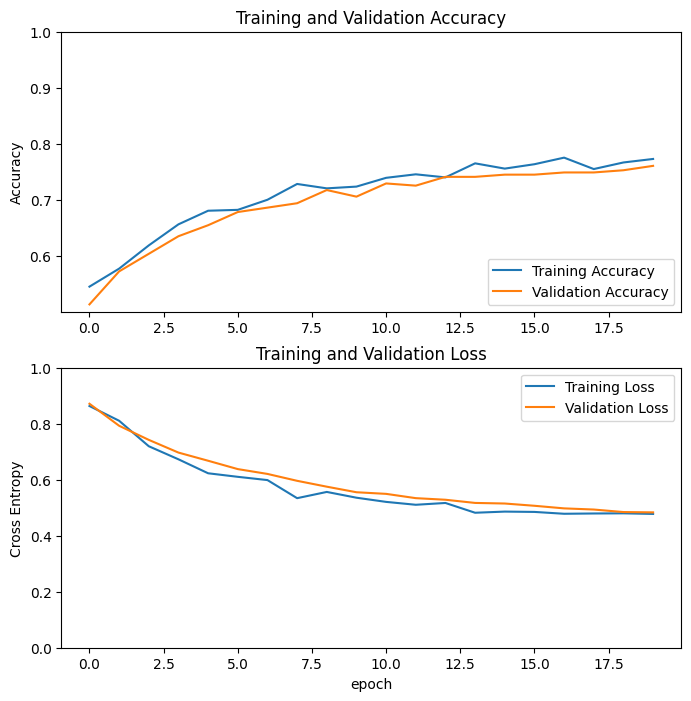

In [233]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

The validation mirrors the accuracy increases with each epoch as seen in the plot above.

### Fine Tuning
The next step is to fine tune the model. The first step we will perform is unfreezing the weights of the base model.

In [234]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Recompile the Model

In [235]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

### Continue Training the Model

In [237]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(trainingImage,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validationImage)

Epoch 20/40
40/40 [==============================] - 32s 541ms/step - loss: 0.4723 - accuracy: 0.7700 - val_loss: 0.4396 - val_accuracy: 0.8039
Epoch 21/40
40/40 [==============================] - 21s 537ms/step - loss: 0.4156 - accuracy: 0.8114 - val_loss: 0.4280 - val_accuracy: 0.8196
Epoch 22/40
40/40 [==============================] - 22s 556ms/step - loss: 0.3641 - accuracy: 0.8271 - val_loss: 0.4368 - val_accuracy: 0.8314
Epoch 23/40
40/40 [==============================] - 23s 574ms/step - loss: 0.3736 - accuracy: 0.8286 - val_loss: 0.4617 - val_accuracy: 0.8196
Epoch 24/40
40/40 [==============================] - 23s 581ms/step - loss: 0.3477 - accuracy: 0.8365 - val_loss: 0.3926 - val_accuracy: 0.8392
Epoch 25/40
40/40 [==============================] - 23s 573ms/step - loss: 0.3184 - accuracy: 0.8529 - val_loss: 0.4073 - val_accuracy: 0.8196
Epoch 26/40
40/40 [==============================] - 23s 574ms/step - loss: 0.3055 - accuracy: 0.8560 - val_loss: 0.3989 - val_accuracy:

In [238]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

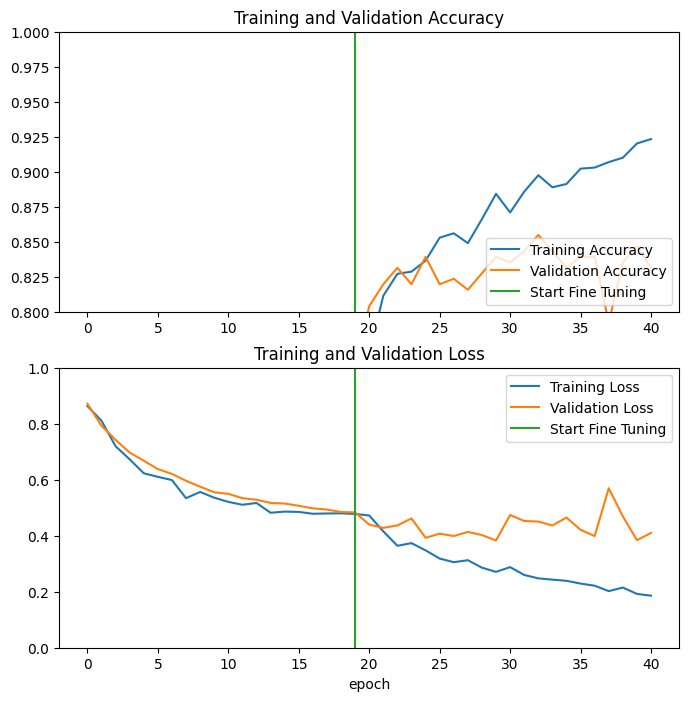

In [239]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluate Model

In [240]:
loss, accuracy = model.evaluate(testImage)
print('Test accuracy :', accuracy)

2023-04-16 16:25:56.379854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [319]
	 [[{{node Placeholder/_4}}]]
2023-04-16 16:25:56.380709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [319]
	 [[{{node Placeholder/_4}}]]
2023-04-16 16:26:03.531106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data
2023-04-16 16:26:04.340295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 16:26:06.325219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: know

2/2 [==============================] - 12s 945ms/step - loss: 0.4267 - accuracy: 0.7500
Test accuracy : 0.75


There is a slight reduction in accuracy when compared to the CNN model.

2023-04-16 16:28:00.325120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: extra compressed data
2023-04-16 16:28:01.024892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 16:28:03.036130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-04-16 16:28:03.036173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-04-16 16:28:03.647205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [32,100,100,3]
	 [[{{node Placeholder/_0}}]]


Predictions:
 [1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1]
Labels:
 [1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]


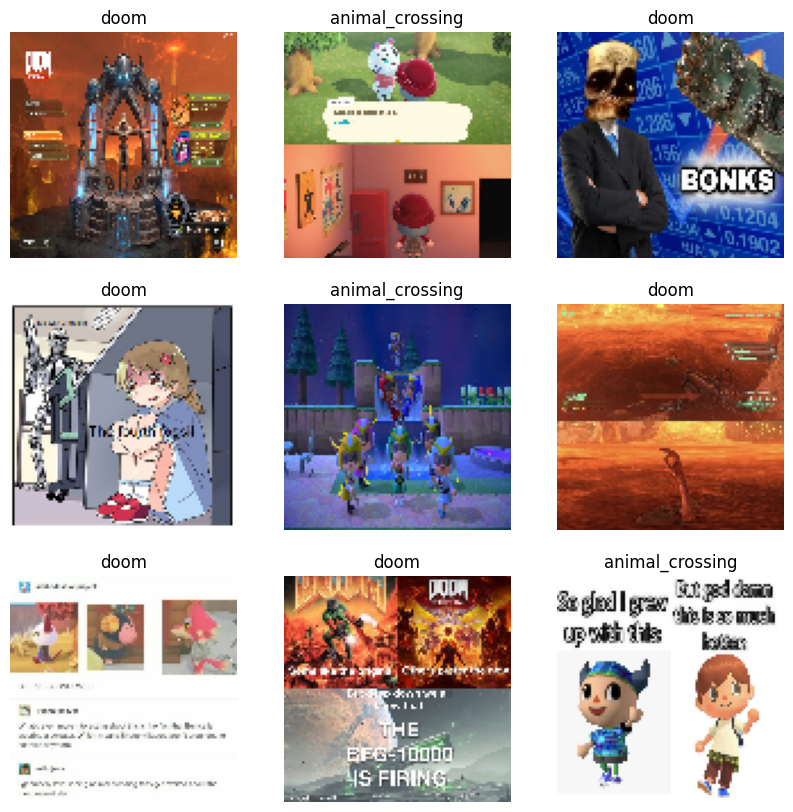

In [241]:
# Retrieve a batch of images from the test set
image_batch, label_batch = testImage.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

### Analysis

The goal of this project was to be able to differentiate images associated with the video game franchises Doom and Animal Crossing. This was done by training three separate models using TensorFlow and Keras. The first model created is a sequential model that uses two dense hidden layers. The second is a convolutional model while the third model was a transfer learning model based on the MobileNetV2 pre-trained model.
Looking more in depth at the architectures of each model, the sequential model utilized 2 hidden layers with 512 nodes each and an output layer with 2 nodes for the two classes to be identified. The hidden layers relied on the relu activation function, while the outer layer utilized a softmax activation. Next, the convolutional model contained three inner convolutional layers with, 16, 32, and 64 filters respectively. Another layer with 128 nodes is added in the end, followed by the outer layer with 2 nodes for the output classes. The activation functions used are the same as the. The third model is fine tuned for the dataset and is based on the MobileNetsV2 model. The data was divided using an 80/20 split for train and validation sets. The validation set was further divided to create a test set. Each model was fed the same data, with the top performing model being the convolutional model, followed by the transfer learning model, and in last place the sequential model.